In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.datasets import load_iris
from sklearn import tree


In [2]:

df1 = pd.read_csv('combined_datasets_csv.csv')

# df2 = df1.describe(include='all')

# df2.to_excel('summary_statistics.xlsx')



In [3]:
### MODELS



X = df1.copy()

X = X.drop(['SH_Price', 'Model'], axis=1)
y = df1['SH_Price']

# print(X)
# print(y)

# one-hot encoding for all variables
X = pd.get_dummies(X, columns=['Brand', 'Color', 'Condition', 'Date_Extracted'], drop_first=True)

# split the data with 70/30 proportions for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=666)


<AxesSubplot:>

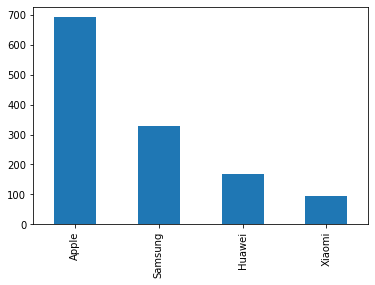

In [7]:
df1['Brand'].value_counts().plot(kind = 'bar')

In [10]:
dfModel = df1.groupby('Brand').Model.nunique()


In [14]:
df1.groupby('Brand').Model.count()

Brand
Apple      691
Huawei     169
Samsung    329
Xiaomi      96
Name: Model, dtype: int64

<AxesSubplot:xlabel='Brand'>

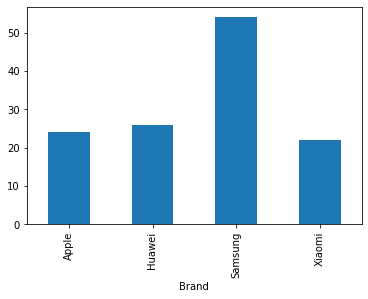

In [12]:
dfModel.plot(kind = 'bar')

array([[<AxesSubplot:title={'center':'SH_Price'}>]], dtype=object)

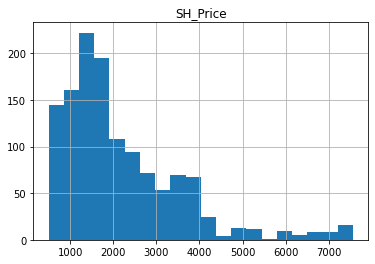

In [8]:
df1.hist(column = 'SH_Price', bins = 20)

array([[<AxesSubplot:title={'center':'New_Price'}>]], dtype=object)

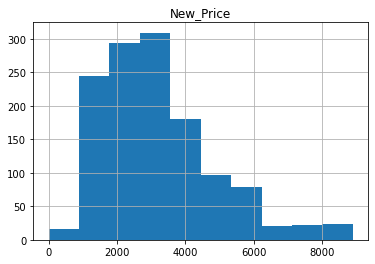

In [10]:
df1.hist(column = 'New_Price')

In [4]:
### LINEAR REGRESSION

linear_model = LinearRegression(fit_intercept=True)

linear_model.fit(X_train,y_train)

# model prediction
y_predict = linear_model.predict(X_train)

# model performance
r2_score(y_train, y_predict)

# model prediction
y_predict = linear_model.predict(X_test)

# test set
r2_score(y_test, y_predict)

mean_absolute_error(y_test, y_predict)

214.04038200224147

In [5]:
mean_absolute_percentage_error(y_test, y_predict)

0.12984683311778775

In [6]:
# test set
r2_score(y_test, y_predict)

0.9659178624184859

In [32]:
X_test.iloc[10]

New_Price                    2800.0
Memory                         64.0
Ram                             4.0
Resolution                    820.0
Battery_size                 3110.0
No_Rear_Cameras                 2.0
Model_year                   2019.0
Rating                          4.2
Brand_Huawei                    0.0
Brand_Samsung                   0.0
Brand_Xiaomi                    0.0
Color_Blue                      0.0
Color_Bronze                    0.0
Color_Coral                     0.0
Color_Gold                      0.0
Color_Green                     0.0
Color_Grey                      0.0
Color_Other                     0.0
Color_Pink                      0.0
Color_Purple                    0.0
Color_Red                       0.0
Color_White                     0.0
Color_Yellow                    0.0
Condition_  Ca Nou              1.0
Condition_  Excelent            0.0
Condition_  Foarte Bun          0.0
Date_Extracted_30.04.2022       0.0
Name: 384, dtype: float64

Feature: 0, Score: 0.65165
Feature: 1, Score: 1.04035
Feature: 2, Score: -39.39114
Feature: 3, Score: -0.14732
Feature: 4, Score: 0.08484
Feature: 5, Score: -28.94486
Feature: 6, Score: 139.99947
Feature: 7, Score: -29.66879
Feature: 8, Score: -252.59491
Feature: 9, Score: -174.29475
Feature: 10, Score: -351.04003
Feature: 11, Score: 53.85236
Feature: 12, Score: 0.00000
Feature: 13, Score: 11.78341
Feature: 14, Score: -103.09758
Feature: 15, Score: -73.47604
Feature: 16, Score: 0.72558
Feature: 17, Score: 45.57900
Feature: 18, Score: 13.08521
Feature: 19, Score: -45.75067
Feature: 20, Score: -49.76247
Feature: 21, Score: -77.17656
Feature: 22, Score: -173.96949
Feature: 23, Score: 318.08913
Feature: 24, Score: 213.97552
Feature: 25, Score: 113.54174
Feature: 26, Score: -0.78173


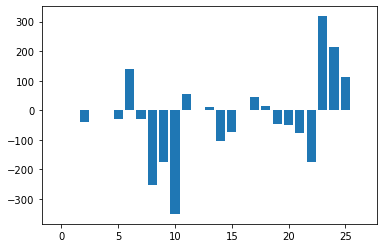

In [27]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# get importance
importance = linear_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [7]:
### DECISION TREE

# grid search & model selection and tuning
param_grid = {'random_state': [80,90,100],
              'max_depth': [10,20,30],
              'min_samples_leaf': [3,5]}

grid_dt = GridSearchCV(DecisionTreeRegressor(),
                    param_grid, cv=5)

grid_dt.fit(X_train, y_train)

# best model
best_model_dt = grid_dt.best_estimator_

# best model score for the training set
grid_dt.best_score_ 

# R2 score on the test set 
best_model_dt.score(X_test,y_test) 

y_predict = best_model_dt.predict(X_test)


In [8]:
best_model_dt.score(X_test,y_test) 


0.9918072426342759

In [9]:
best_model_dt

DecisionTreeRegressor(max_depth=20, min_samples_leaf=3, random_state=100)

In [10]:
# y_pred = best_model_dt.predict(X_test)

#mean_squared_error(y_test, y_pred, squared=False)
mean_absolute_error(y_test, y_predict)

68.7018874907476

In [11]:
mean_absolute_percentage_error(y_test, y_predict)

0.03604763062964456

Feature: 0, Score: 0.96696
Feature: 1, Score: 0.00156
Feature: 2, Score: 0.00404
Feature: 3, Score: 0.00178
Feature: 4, Score: 0.00552
Feature: 5, Score: 0.00052
Feature: 6, Score: 0.01230
Feature: 7, Score: 0.00399
Feature: 8, Score: 0.00005
Feature: 9, Score: 0.00029
Feature: 10, Score: 0.00008
Feature: 11, Score: 0.00004
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00036
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00061
Feature: 24, Score: 0.00054
Feature: 25, Score: 0.00056
Feature: 26, Score: 0.00061


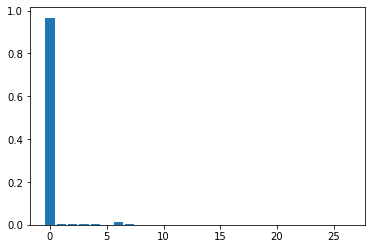

In [37]:
# # get importance
importance = best_model_dt.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


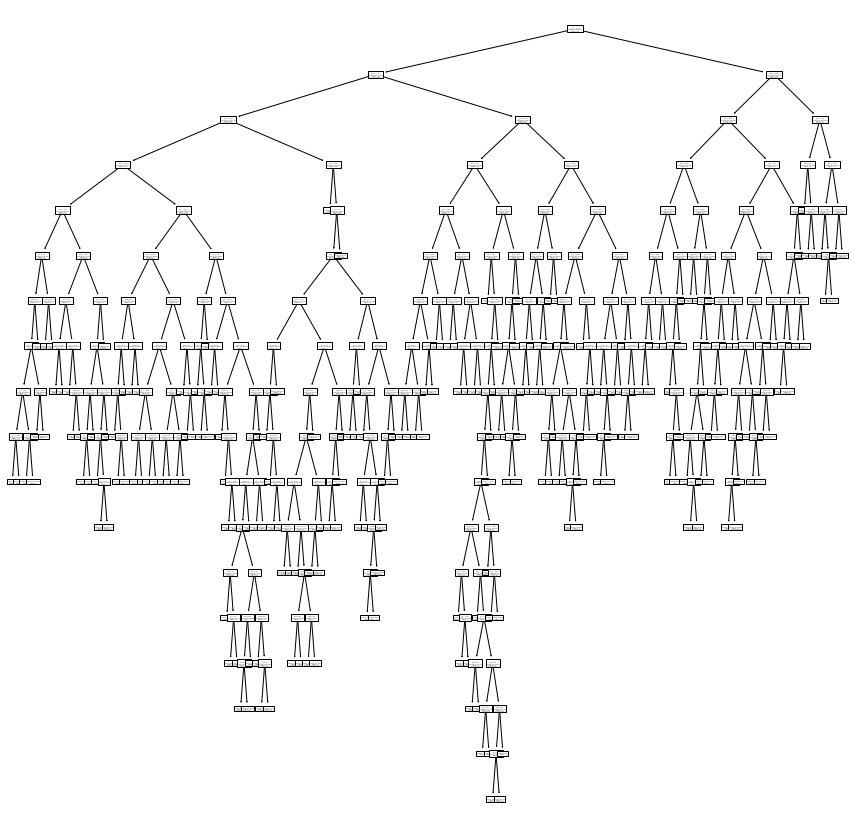

In [48]:
plt.figure(figsize=(15, 15))
tree.plot_tree(best_model_dt)
plt.show()

ValueError: x and y must be the same size

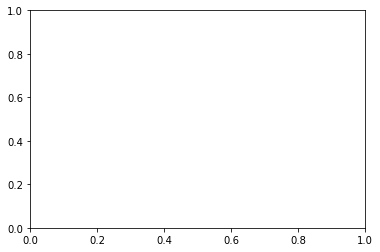

In [12]:
### RANDOM FOREST

# model selection and tuning
param_grid = {'n_estimators': [580, 590, 600],
              'max_depth': [10, 20, 50, 180, 190, 200],
              'min_samples_split': [5, 25, 50]}

grid_rf = GridSearchCV(RandomForestRegressor(),
                       param_grid, cv=10)

grid_rf.fit(X_train, y_train)

# best model
best_model_rf = grid_rf.best_estimator_
print(best_model_rf)

# best model score for the training set
# print(grid_rf.best_score_)

# R2 score on the test set
print(best_model_rf.score(X_test, y_test))



RandomForestRegressor(max_depth=180, min_samples_split=5, n_estimators=590)
0.9943200614002006


In [6]:
### MORE parameters to tune

### RANDOM FOREST

# model selection and tuning
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [10, 20, 50, 180, 190, 200],
              'min_samples_split': [5, 25, 50]}

grid_rf = GridSearchCV(RandomForestRegressor(),
                       param_grid, cv=10)

grid_rf.fit(X_train, y_train)

# best model
best_model_rf = grid_rf.best_estimator_
print(best_model_rf)

# best model score for the training set
# print(grid_rf.best_score_)

# R2 score on the test set
print(best_model_rf.score(X_test, y_test))



RandomForestRegressor(max_depth=50, min_samples_split=5, n_estimators=400)
0.9944528546115634


In [13]:
y_pred = best_model_rf.predict(X_test)

mean_absolute_error(y_test, y_pred)

57.99485362080901

In [14]:
mean_absolute_percentage_error(y_test, y_pred)

0.03034088071166223

In [ ]:
### Variable importance

Feature: 0, Score: 0.97446
Feature: 1, Score: 0.00158
Feature: 2, Score: 0.00091
Feature: 3, Score: 0.00197
Feature: 4, Score: 0.00456
Feature: 5, Score: 0.00071
Feature: 6, Score: 0.01111
Feature: 7, Score: 0.00352
Feature: 8, Score: 0.00019
Feature: 9, Score: 0.00010
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00034
Feature: 24, Score: 0.00021
Feature: 25, Score: 0.00010
Feature: 26, Score: 0.00006


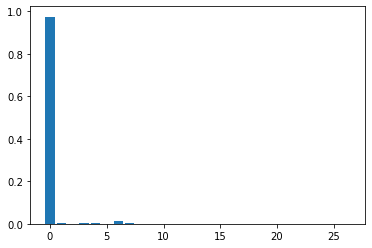

In [8]:
# # get importance
importance = best_model_rf.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [15]:
### GRADIENT BOOSTING REGRESSION




param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [.01, .1, .5, 1, 1.5]}

grid_br = GridSearchCV(GradientBoostingRegressor(),
                       param_grid, cv=5)

grid_br.fit(X_train, y_train)

grid_br.best_params_

# best model
best_model_br = grid_br.best_estimator_
print(best_model_br)
# best model score for the training set
grid_br.best_score_

# best model score for the test set
# test set checking
print(best_model_br.score(X_test, y_test))


GradientBoostingRegressor(learning_rate=0.5, n_estimators=200)
0.9955863617362605


In [16]:
y_pred = best_model_br.predict(X_test)

mean_absolute_error(y_test, y_pred)

42.23845072311489

In [17]:
mean_absolute_percentage_error(y_test, y_pred)

0.020750494639055508

Feature: 0, Score: 0.96579
Feature: 1, Score: 0.00258
Feature: 2, Score: 0.00150
Feature: 3, Score: 0.00064
Feature: 4, Score: 0.00336
Feature: 5, Score: 0.00340
Feature: 6, Score: 0.01272
Feature: 7, Score: 0.00562
Feature: 8, Score: 0.00002
Feature: 9, Score: 0.00015
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00004
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00032
Feature: 17, Score: 0.00007
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.00004
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00170
Feature: 24, Score: 0.00103
Feature: 25, Score: 0.00052
Feature: 26, Score: 0.00031


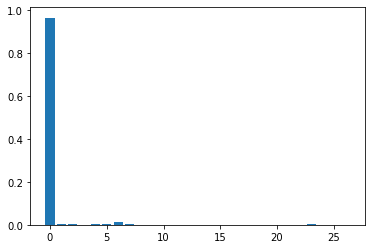

In [70]:
# # get importance
importance = best_model_br.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#################### NO NEW PRICE

In [18]:
# Dataset split

X = df1.copy()

X = X.drop(['SH_Price', 'Model', 'New_Price'], axis=1)
y = df1['SH_Price']

# print(X)
# print(y)

# one-hot encoding for all variables
X = pd.get_dummies(X, columns=['Brand', 'Color', 'Condition', 'Date_Extracted'], drop_first=True)

# split the data with 70/30 proportions for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=666)


In [19]:
### LINEAR REGRESSION

linear_model = LinearRegression(fit_intercept=True)

linear_model.fit(X_train,y_train)

# model prediction
y_predict = linear_model.predict(X_train)

# model performance
r2_score(y_train, y_predict)

# model prediction
y_predict = linear_model.predict(X_test)

# test set
r2_score(y_test, y_predict)

0.9047801578636343

In [77]:
mean_absolute_error(y_test, y_predict)

340.1382677064867

In [20]:
mean_absolute_percentage_error(y_test, y_predict)

0.20757354032159897

Feature: 0, Score: 3.21758
Feature: 1, Score: 113.23256
Feature: 2, Score: 0.96226
Feature: 3, Score: 0.22684
Feature: 4, Score: -61.25900
Feature: 5, Score: 324.71372
Feature: 6, Score: 165.21492
Feature: 7, Score: -1754.99464
Feature: 8, Score: -1735.16985
Feature: 9, Score: -2345.38653
Feature: 10, Score: 235.56572
Feature: 11, Score: 0.00000
Feature: 12, Score: -44.13232
Feature: 13, Score: 31.21838
Feature: 14, Score: -89.67863
Feature: 15, Score: 91.97796
Feature: 16, Score: -34.15332
Feature: 17, Score: 86.71136
Feature: 18, Score: -21.66692
Feature: 19, Score: -255.68881
Feature: 20, Score: -42.95692
Feature: 21, Score: -234.51066
Feature: 22, Score: 386.93017
Feature: 23, Score: 238.63911
Feature: 24, Score: 118.73240
Feature: 25, Score: -1.95761


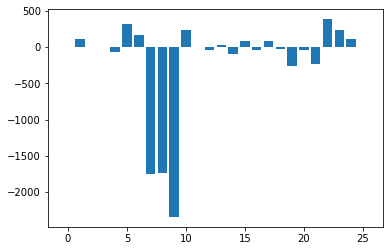

In [39]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# get importance
importance = linear_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
### DECISION TREE

# grid search & model selection and tuning
param_grid = {'random_state': [80,90,100],
              'max_depth': [10,20,30],
              'min_samples_leaf': [3,5]}

grid_dt = GridSearchCV(DecisionTreeRegressor(),
                    param_grid, cv=5)

grid_dt.fit(X_train, y_train)

# best model
best_model_dt = grid_dt.best_estimator_

# best model score for the training set
grid_dt.best_score_ 

# R2 score on the test set 
best_model_dt.score(X_test,y_test) 





0.960363515554717

In [22]:
best_model_dt

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=90)

In [23]:
y_predict = best_model_dt.predict(X_test)
mean_absolute_error(y_test, y_predict)

123.54392239165554

In [24]:
mean_absolute_percentage_error(y_test, y_predict)

0.0704396370809591

Feature: 0, Score: 0.47525
Feature: 1, Score: 0.04080
Feature: 2, Score: 0.09666
Feature: 3, Score: 0.03339
Feature: 4, Score: 0.03812
Feature: 5, Score: 0.24684
Feature: 6, Score: 0.03469
Feature: 7, Score: 0.02877
Feature: 8, Score: 0.00198
Feature: 9, Score: 0.00023
Feature: 10, Score: 0.00028
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00015
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00052
Feature: 23, Score: 0.00011
Feature: 24, Score: 0.00159
Feature: 25, Score: 0.00057


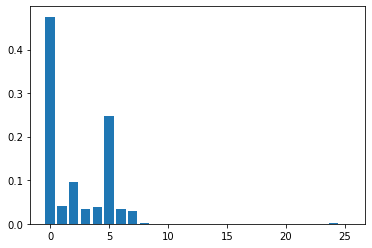

In [57]:
# # get importance
importance = best_model_dt.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [58]:
X_test.iloc[10]

Memory                         64.0
Ram                             4.0
Resolution                    820.0
Battery_size                 3110.0
No_Rear_Cameras                 2.0
Model_year                   2019.0
Rating                          4.2
Brand_Huawei                    0.0
Brand_Samsung                   0.0
Brand_Xiaomi                    0.0
Color_Blue                      0.0
Color_Bronze                    0.0
Color_Coral                     0.0
Color_Gold                      0.0
Color_Green                     0.0
Color_Grey                      0.0
Color_Other                     0.0
Color_Pink                      0.0
Color_Purple                    0.0
Color_Red                       0.0
Color_White                     0.0
Color_Yellow                    0.0
Condition_  Ca Nou              1.0
Condition_  Excelent            0.0
Condition_  Foarte Bun          0.0
Date_Extracted_30.04.2022       0.0
Name: 384, dtype: float64

In [28]:
## RF 

# model selection and tuning
param_grid = {'n_estimators': [580, 590, 600],
              'max_depth': [180, 190, 200],
              'min_samples_split': [25, 50]}

grid_rf = GridSearchCV(RandomForestRegressor(),
                       param_grid, cv=10)

grid_rf.fit(X_train, y_train)

# best model
best_model_rf = grid_rf.best_estimator_
print(best_model_rf)

# best model score for the training set
print(grid_rf.best_score_)

# R2 score on the test set
print(best_model_rf.score(X_test, y_test))


RandomForestRegressor(max_depth=180, min_samples_split=25, n_estimators=600)
0.9562281796632428
0.966626865107659


In [9]:
###DIFFERENT PARAMETERS

## RF 

# model selection and tuning
param_grid = {'n_estimators': [100, 200, 300, 400],
              'max_depth': [50, 100, 150, 200],
              'min_samples_split': [5, 10, 25, 50]}

grid_rf = GridSearchCV(RandomForestRegressor(),
                       param_grid, cv=5)

grid_rf.fit(X_train, y_train)

# best model
best_model_rf = grid_rf.best_estimator_
print(best_model_rf)

# best model score for the training set
print(grid_rf.best_score_)

# R2 score on the test set
print(best_model_rf.score(X_test, y_test))


RandomForestRegressor(max_depth=200, min_samples_split=5, n_estimators=200)
0.9936424097757651
0.9943722398558075


In [29]:
y_pred = best_model_rf.predict(X_test)

mean_absolute_error(y_test, y_pred)

173.07496489470722

In [30]:
mean_absolute_percentage_error(y_test, y_pred)

0.09048547037134994

Feature: 0, Score: 0.46778
Feature: 1, Score: 0.04337
Feature: 2, Score: 0.17631
Feature: 3, Score: 0.05244
Feature: 4, Score: 0.01308
Feature: 5, Score: 0.17731
Feature: 6, Score: 0.05431
Feature: 7, Score: 0.01040
Feature: 8, Score: 0.00163
Feature: 9, Score: 0.00251
Feature: 10, Score: 0.00046
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00004
Feature: 15, Score: 0.00009
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00008
Feature: 23, Score: 0.00005
Feature: 24, Score: 0.00009
Feature: 25, Score: 0.00000


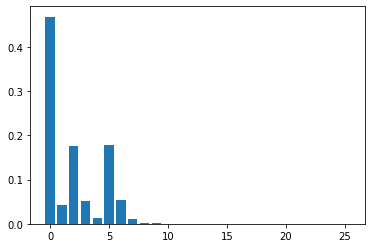

In [64]:
# # get importance
importance = best_model_rf.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [65]:
X_test.iloc[10]

Memory                         64.0
Ram                             4.0
Resolution                    820.0
Battery_size                 3110.0
No_Rear_Cameras                 2.0
Model_year                   2019.0
Rating                          4.2
Brand_Huawei                    0.0
Brand_Samsung                   0.0
Brand_Xiaomi                    0.0
Color_Blue                      0.0
Color_Bronze                    0.0
Color_Coral                     0.0
Color_Gold                      0.0
Color_Green                     0.0
Color_Grey                      0.0
Color_Other                     0.0
Color_Pink                      0.0
Color_Purple                    0.0
Color_Red                       0.0
Color_White                     0.0
Color_Yellow                    0.0
Condition_  Ca Nou              1.0
Condition_  Excelent            0.0
Condition_  Foarte Bun          0.0
Date_Extracted_30.04.2022       0.0
Name: 384, dtype: float64

In [31]:
### GRADIENT BOOSTING REGRESSION




param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [.01, .1, .5, 1, 1.5]}

grid_br = GridSearchCV(GradientBoostingRegressor(),
                       param_grid, cv=5)

grid_br.fit(X_train, y_train)

grid_br.best_params_

# best model
best_model_br = grid_br.best_estimator_
print(best_model_br)
# best model score for the training set
grid_br.best_score_

# best model score for the test set
# test set checking
print(best_model_br.score(X_test, y_test))


GradientBoostingRegressor(learning_rate=0.5, n_estimators=200)
0.9936316385749757


In [32]:
y_pred = best_model_br.predict(X_test)

mean_absolute_error(y_test, y_pred)

63.21146667166422

In [33]:
mean_absolute_percentage_error(y_test, y_pred)

0.035950287584297275

Feature: 0, Score: 0.46755
Feature: 1, Score: 0.06383
Feature: 2, Score: 0.11451
Feature: 3, Score: 0.03667
Feature: 4, Score: 0.00736
Feature: 5, Score: 0.23632
Feature: 6, Score: 0.03812
Feature: 7, Score: 0.01096
Feature: 8, Score: 0.00465
Feature: 9, Score: 0.01255
Feature: 10, Score: 0.00072
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00017
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00090
Feature: 16, Score: 0.00033
Feature: 17, Score: 0.00061
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00038
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00085
Feature: 23, Score: 0.00221
Feature: 24, Score: 0.00085
Feature: 25, Score: 0.00036


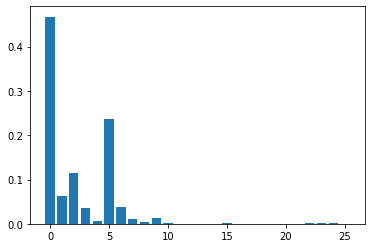

In [74]:
# # get importance
importance = best_model_br.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [75]:
X_test.iloc[10]

Memory                         64.0
Ram                             4.0
Resolution                    820.0
Battery_size                 3110.0
No_Rear_Cameras                 2.0
Model_year                   2019.0
Rating                          4.2
Brand_Huawei                    0.0
Brand_Samsung                   0.0
Brand_Xiaomi                    0.0
Color_Blue                      0.0
Color_Bronze                    0.0
Color_Coral                     0.0
Color_Gold                      0.0
Color_Green                     0.0
Color_Grey                      0.0
Color_Other                     0.0
Color_Pink                      0.0
Color_Purple                    0.0
Color_Red                       0.0
Color_White                     0.0
Color_Yellow                    0.0
Condition_  Ca Nou              1.0
Condition_  Excelent            0.0
Condition_  Foarte Bun          0.0
Date_Extracted_30.04.2022       0.0
Name: 384, dtype: float64